In [1]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv


In [3]:
nyc = pd.read_csv('/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv')
nyc.sample(5)

/tmp/ipykernel_20/279260890.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc = pd.read_csv('/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
35748,714486255972674289,No Extra Fees | Bright 1 BR by Central Park w...,476568387,Nice Stay NYC,Manhattan,Midtown,40.76697,-73.98267,Entire home/apt,302,30,0,NaN,NaN,9,147,0,NaN
16462,32789340,Cozy West Village Apartment,9746153,Sam,Manhattan,West Village,40.73296,-74.00481,Entire home/apt,170,2,13,2019-10-14,0.27,1,0,0,NaN
12659,22751906,Metropolitan Brooklyn Oasis in Heart of Bed Stuy,167019780,Derick,Brooklyn,Bedford-Stuyvesant,40.68013,-73.93400,Entire home/apt,165,3,90,2023-01-25,1.47,1,252,25,NaN
35538,713095540657225082,NY Midtown 45 hotel room,240078487,Steven,Manhattan,Midtown,40.75298,-73.97334,Entire home/apt,310,2,1,2022-09-22,0.18,6,90,1,NaN
25588,50620615,Massive Apt Centrally Located DWNTWN 3 BDRM,187466087,Tiff,Manhattan,Two Bridges,40.71126,-73.99839,Entire home/apt,252,2,5,2023-01-01,0.85,1,148,5,NaN


In [4]:
nyc.shape

(42931, 18)

In [5]:
nyc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [6]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  int64  
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  42931 non-null  int64  
 11  number_of_reviews               42931 non-null  int64  
 12  last_review                     

Axes(0.125,0.11;0.62x0.77)
id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42930
dtype: int64


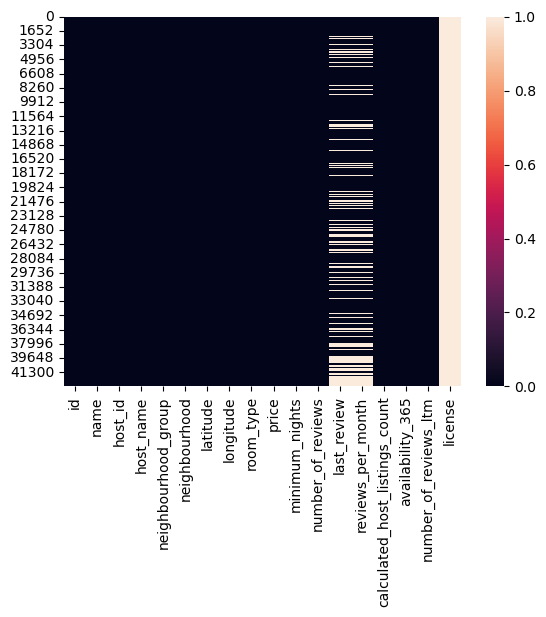

In [7]:
print(sns.heatmap(nyc.isna()))
print(nyc.isna().sum())


# i see a lot of null values im gonna delete the license column and other useless columns and clean the data 

In [8]:
nyc.duplicated().any()

False

In [9]:
columns_to_drop = ['id', 'name', 'host_id', 'host_name', 'number_of_reviews', 'last_review',
                   'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
                   'number_of_reviews_ltm', 'license']
nyc = nyc.drop(columns_to_drop, axis=1)
nyc.head(1)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights
0,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30


In [10]:
nyc["neighbourhood_group"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

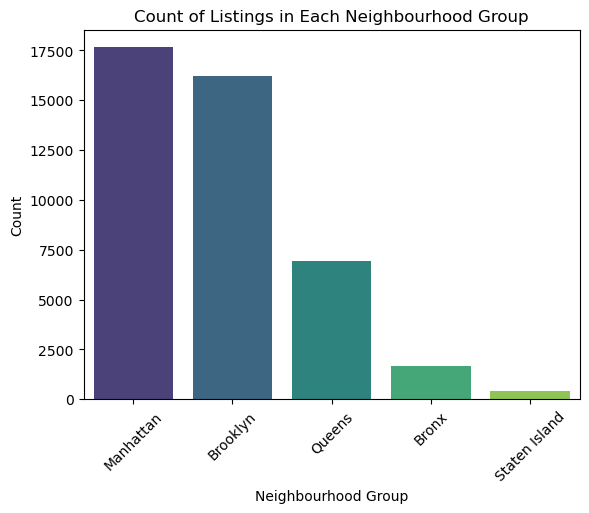

In [11]:
neighbourhood_group_counts = nyc["neighbourhood_group"].value_counts()
sns.barplot(x=neighbourhood_group_counts.index, y=neighbourhood_group_counts, palette="viridis")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.title("Count of Listings in Each Neighbourhood Group")
plt.xticks(rotation=45)
plt.show()


(-74.26190700000001, -73.70087)

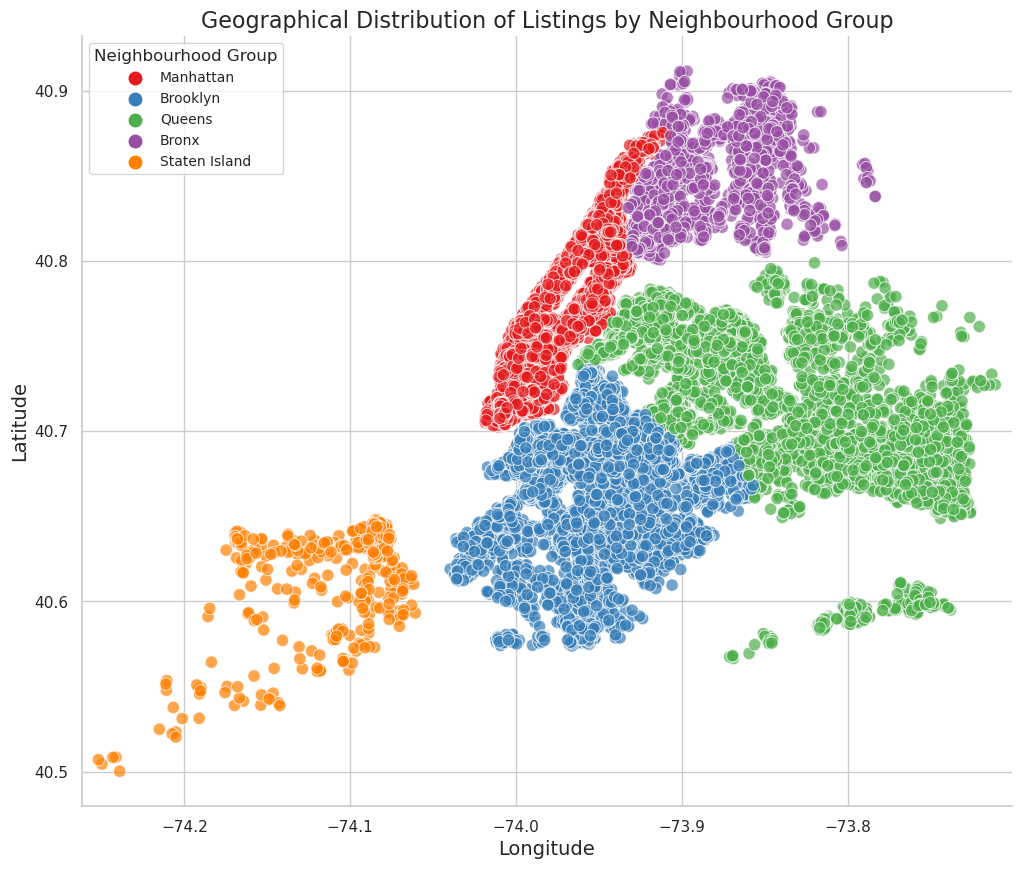

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
palette = sns.color_palette("Set1", n_colors=len(nyc['neighbourhood_group'].unique()))
sns.scatterplot(data=nyc, x='longitude', y='latitude', hue='neighbourhood_group', palette=palette, s=80, alpha=0.7)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Geographical Distribution of Listings by Neighbourhood Group', fontsize=16)
plt.legend(title='Neighbourhood Group', title_fontsize=12, fontsize=10, markerscale=1.5)
sns.despine(right=True, top=True)
plt.xlim(nyc['longitude'].min() - 0.01, nyc['longitude'].max() + 0.01)

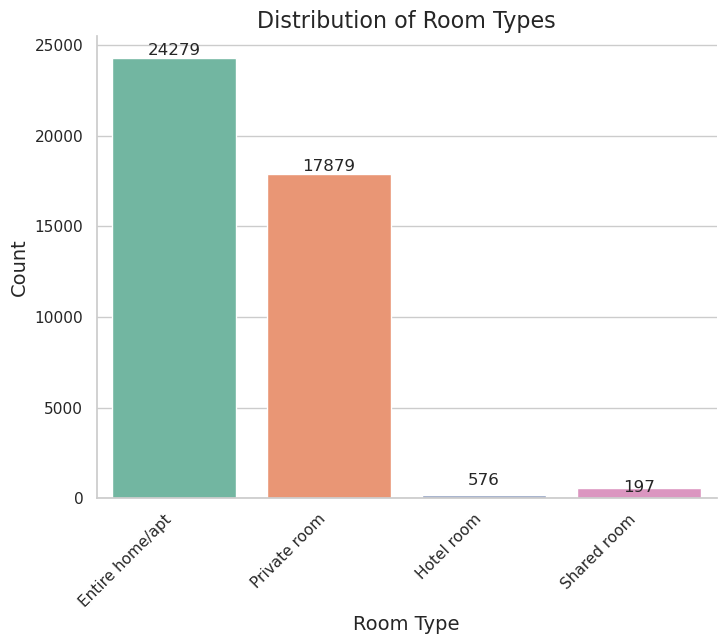

In [13]:
room_type_counts = nyc["room_type"].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=nyc, x="room_type", palette="Set2")
plt.xlabel("Room Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Room Types", fontsize=16)
plt.xticks(rotation=45, ha='right')
for idx, count in enumerate(room_type_counts):
    plt.text(idx, count, str(count), ha='center', va='bottom', fontsize=12)
sns.despine(right=True, top=True)
plt.show()

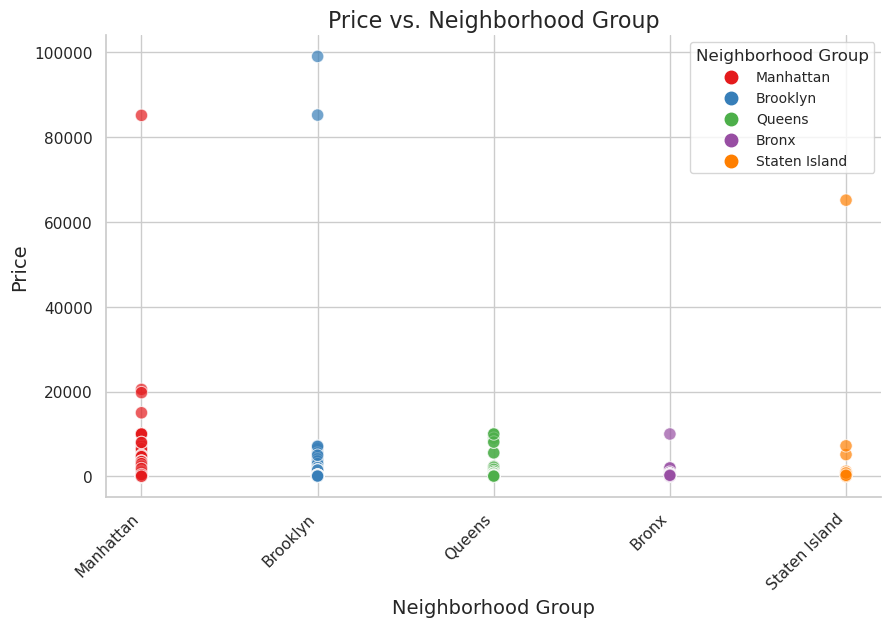

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nyc, x='neighbourhood_group', y='price', hue='neighbourhood_group', palette='Set1', s=80, alpha=0.7)
plt.xlabel('Neighborhood Group', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price vs. Neighborhood Group', fontsize=16)
plt.legend(title='Neighborhood Group', title_fontsize=12, fontsize=10, markerscale=1.5)
sns.despine(right=True, top=True)
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
room_type_mean_price = nyc.groupby('room_type')['price'].mean()

print(room_type_mean_price)


room_type
Entire home/apt    249.255365
Hotel room         309.959391
Private room       135.015046
Shared room        126.250000
Name: price, dtype: float64


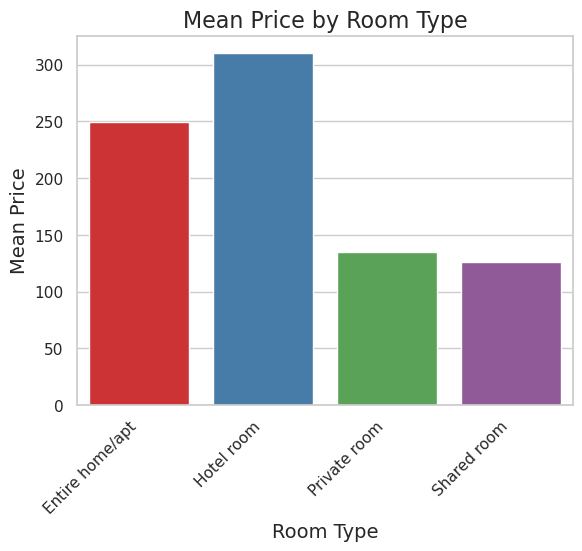

In [16]:
sns.barplot(x=room_type_mean_price.index, y=room_type_mean_price.values, palette='Set1')
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Mean Price', fontsize=14)
plt.title('Mean Price by Room Type', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
group_mean_price = nyc.groupby('neighbourhood_group')['price'].mean()

print(group_mean_price)

neighbourhood_group
Bronx            117.512123
Brooklyn         162.766829
Manhattan        268.365783
Queens           128.173655
Staten Island    309.037296
Name: price, dtype: float64


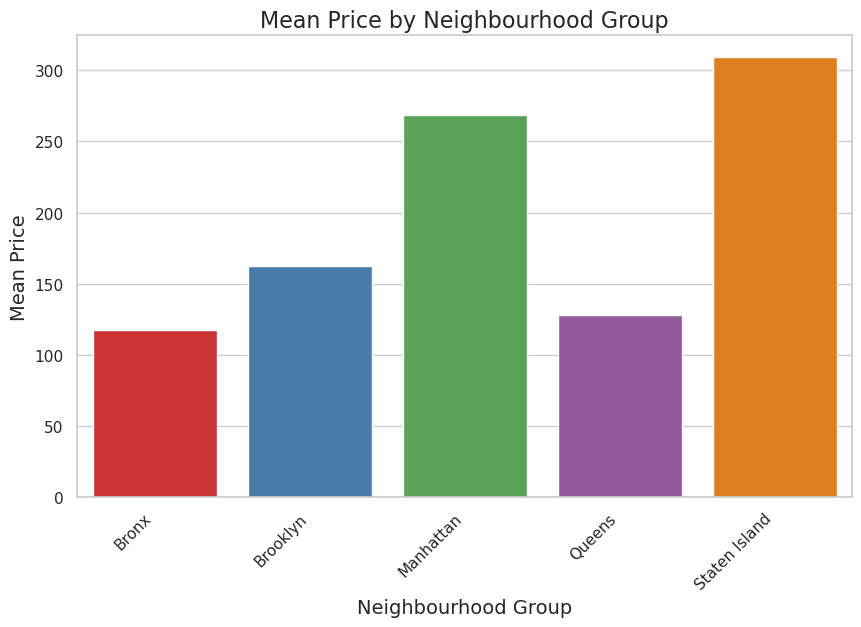

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=group_mean_price.index, y=group_mean_price.values, palette='Set1')
plt.xlabel('Neighbourhood Group', fontsize=14)
plt.ylabel('Mean Price', fontsize=14)
plt.title('Mean Price by Neighbourhood Group', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()


### It was all